## Librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator, HillClimbSearch, BicScore

## Dataset

In [2]:
test_df = pd.read_csv('dataset/student_addiction_dataset_test.csv')
train_df = pd.read_csv('dataset/student_addiction_dataset_train.csv')

In [3]:
test_df.shape, train_df.shape

((12744, 11), (50342, 11))

## Transformar valores

In [4]:
test_df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No
1,No,No,Yes,No,No,Yes,No,Yes,No,No,No
2,No,No,No,Yes,No,Yes,No,No,Yes,No,No
3,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes
4,No,No,No,No,Yes,No,No,No,No,Yes,No


In [5]:
train_df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,Yes,No,No,Yes,No,No,No,Yes,No,No,No
1,No,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
2,No,No,No,No,No,Yes,Yes,Yes,No,No,No
3,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes
4,Yes,Yes,No,NaN,No,Yes,Yes,Yes,No,No,Yes


In [6]:
pd.set_option('future.no_silent_downcasting', True)
train_df = train_df.replace({'Yes': 1, 'No': 0})
test_df = test_df.replace({'Yes': 1, 'No': 0})

In [7]:
train_df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1,0,0,1,0,0,0,1,0,0,0
1,0,1,NaN,1,1,1,1,1,1,0,1
2,0,0,0,0,0,1,1,1,0,0,0
3,1,0,1,1,0,1,0,0,0,1,1
4,1,1,0,NaN,0,1,1,1,0,0,1


In [8]:
test_df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1,1,1,0,1,0,0,0,1,0,0
1,0,0,1,0,0,1,0,1,0,0,0
2,0,0,0,1,0,1,0,0,1,0,0
3,1,0,1,0,1,1,0,1,0,1,1
4,0,0,0,0,1,0,0,0,0,1,0


# Balanceo de Clases

In [9]:
test_df['Addiction_Class'].value_counts()

Addiction_Class
0    10105
1     2639
Name: count, dtype: int64

In [10]:
train_df['Addiction_Class'].value_counts()

Addiction_Class
0    35270
1    15072
Name: count, dtype: int64

# Eliminar y transformar nulos

In [11]:
# tiene_nulls = test_df.isnull().sum()
# tiene_nulls

In [12]:
# tiene_nulls = test_df.isnull().sum(axis=1)
# conteo_nulls = tiene_nulls.value_counts().sort_index()
# conteo_nulls

In [13]:
# test_df_filtrado = test_df.dropna()
# test_df_filtrado.head()

In [14]:
# promedios = test_df_filtrado.mean()
# for col in test_df_filtrado.columns:
#     nuevo_valor = 1 if promedios[col] > 0.5 else 0
#     test_df_filtrado.loc[:, col] = test_df_filtrado[col].fillna(nuevo_valor)

In [15]:
# tiene_nulls = test_df_filtrado.isnull().sum()
# tiene_nulls

In [16]:
# test_df_filtrado.head()

In [17]:
# tiene_nulls = train_df.isnull().sum()
# tiene_nulls

In [18]:
# tiene_nulls = train_df.isnull().sum(axis=1)
# conteo_nulls = tiene_nulls.value_counts().sort_index()
# conteo_nulls

In [19]:
# train_df_filtrado = train_df.dropna()
# train_df_filtrado.head()

In [20]:
# promedios = train_df_filtrado.mean()
# for col in train_df_filtrado.columns:
#     nuevo_valor = 1 if promedios[col] > 0.5 else 0
#     train_df_filtrado.loc[:, col] = train_df_filtrado[col].fillna(nuevo_valor)

In [21]:
# tiene_nulls = train_df_filtrado.isnull().sum()
# tiene_nulls

# Analisis previo

In [22]:
train_df.describe()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
count,47780,47844,47792,47805,47888,47766,47799,47765,47730,47889,50342
unique,2,2,2,2,2,2,2,2,2,2,2
top,1,1,1,1,0,0,1,0,1,1,0
freq,24017,23955,23898,23993,23986,23915,24010,23938,24058,24071,35270


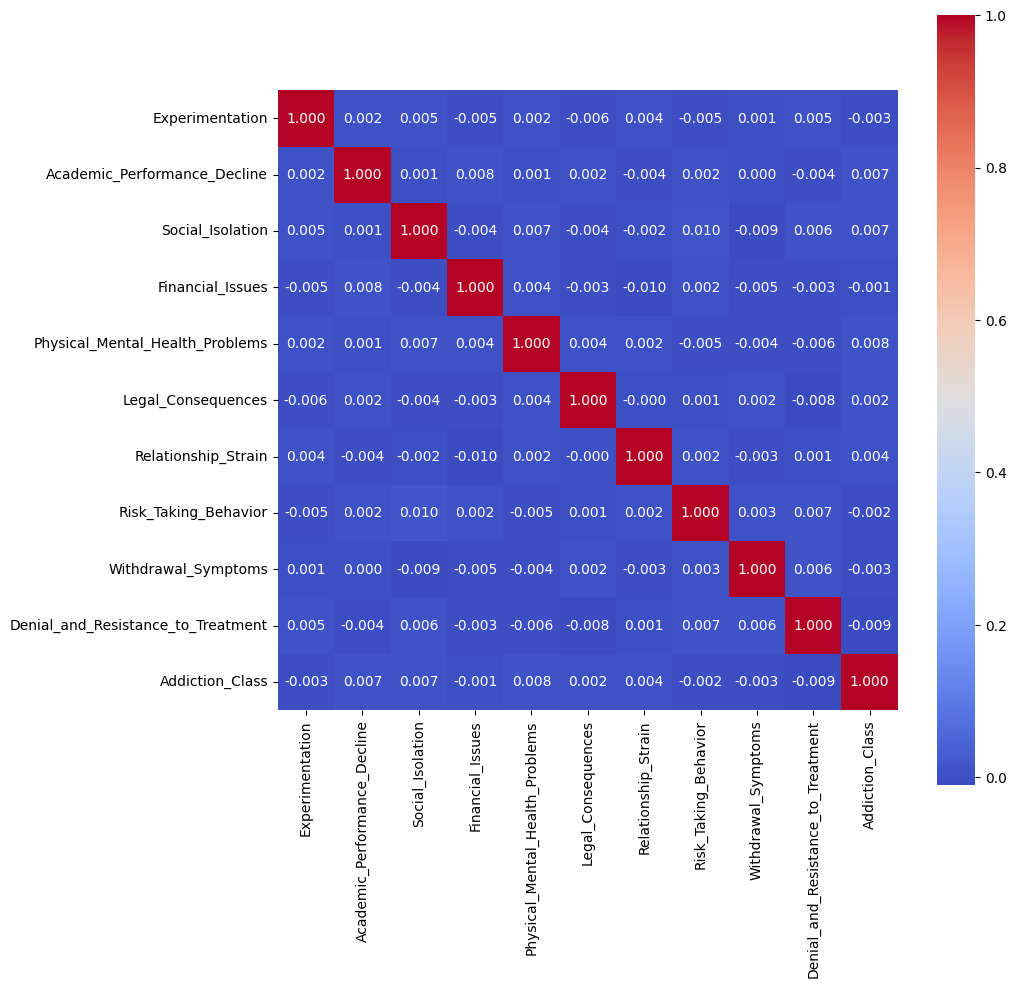

In [23]:
corr = train_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".3f", cmap='coolwarm', cbar=True, square=True)
plt.show()

# Division de dataset

In [24]:
X_train, y_train = train_df.drop(columns=['Addiction_Class']), train_df['Addiction_Class']
X_test, y_test = test_df.drop(columns=['Addiction_Class']), test_df['Addiction_Class']

# Redes Bayesianas

In [25]:
hc = HillClimbSearch(data=train_df)
best_model_1 = hc.estimate(scoring_method=BicScore(train_df))
print(best_model_1.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('Experimentation', 'Academic_Performance_Decline'), ('Experimentation', 'Addiction_Class'), ('Experimentation', 'Financial_Issues'), ('Experimentation', 'Denial_and_Resistance_to_Treatment'), ('Experimentation', 'Relationship_Strain'), ('Experimentation', 'Physical_Mental_Health_Problems'), ('Academic_Performance_Decline', 'Addiction_Class'), ('Academic_Performance_Decline', 'Relationship_Strain'), ('Academic_Performance_Decline', 'Physical_Mental_Health_Problems'), ('Academic_Performance_Decline', 'Denial_and_Resistance_to_Treatment'), ('Social_Isolation', 'Physical_Mental_Health_Problems'), ('Social_Isolation', 'Relationship_Strain'), ('Social_Isolation', 'Experimentation'), ('Social_Isolation', 'Addiction_Class'), ('Social_Isolation', 'Financial_Issues'), ('Social_Isolation', 'Denial_and_Resistance_to_Treatment'), ('Social_Isolation', 'Academic_Performance_Decline'), ('Financial_Issues', 'Relationship_Strain'), ('Financial_Issues', 'Denial_and_Resistance_to_Treatment'), ('Financia

In [26]:
model = BayesianNetwork(best_model_1.edges())
model.fit(train_df, estimator=BayesianEstimator, prior_type="BDeu")
for cpd in model.get_cpds():
    print(cpd)

+----------------------+-----+-------------------------+
| Legal_Consequences   | ... | Legal_Consequences(1)   |
+----------------------+-----+-------------------------+
| Risk_Taking_Behavior | ... | Risk_Taking_Behavior(1) |
+----------------------+-----+-------------------------+
| Social_Isolation     | ... | Social_Isolation(1)     |
+----------------------+-----+-------------------------+
| Withdrawal_Symptoms  | ... | Withdrawal_Symptoms(1)  |
+----------------------+-----+-------------------------+
| Experimentation(0)   | ... | 0.5024790187217559      |
+----------------------+-----+-------------------------+
| Experimentation(1)   | ... | 0.497520981278244       |
+----------------------+-----+-------------------------+
+---------------------------------+-----+-------------------------+
| Experimentation                 | ... | Experimentation(1)      |
+---------------------------------+-----+-------------------------+
| Financial_Issues                | ... | Financial_Iss